# Linear regression practical

### Linear regression with one variable

**First small dataset** (`pop_profit.txt`): You have restaurant franchise and you are considering opening new restaurants in new cities. You already have restaurants in various cities and you have data about your profits according to the population of the cities. You want to use this data to help to select the next cities. The dataset mainly contains 2 columns: population of the city (in 10,000s) and the profit in $10,000s

Use pandas to read the csv (we don't have any column name)

In [9]:
import pandas as pd

data = pd.read_csv('pop_profit.txt', header=None, names=['pop_size', 'profit'])
data

,pop_size,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Extract the x column (1st column) and the y column (2nd column)

x: population size

y: profit in $

In [11]:
data_np = data.to_numpy()

x = data_np[:, 0]
y = data_np[:, 1]
x.shape, y.shape

((97,), (97,))

reshape your data to have: (nb_samples, nb_features)

In [16]:
import numpy as np

In [19]:
x = np.expand_dims(x, axis=1)
x.shape

(97, 1)

Create the Linear regression object from sklearn

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model

LinearRegression()

Now fit the Linear regression on the data


In [22]:
model.fit(x, y)

LinearRegression()

Now display the parameters of the model

check the attributes `intercept_` and `coef_` from the sklearn LinearRegression object

In [23]:
theta0, theta1 = model.intercept_, model.coef_
theta0, theta1

(-3.8957808783118484, array([1.19303364]))

In the following cell, plot data and regression line

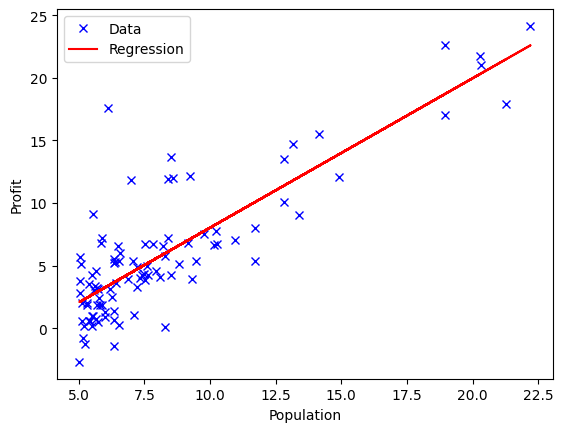

In [26]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'bx', label='Data')
plt.plot(x, model.predict(x), 'r-', label='Regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()

Display the mean squared error of the model, on the full dataset

In [28]:
np.mean((model.predict(x) - y) ** 2)

8.953942751950358

Display the training score now

Understanding R-squared (R²)

R-squared, often written as R², is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. In simpler terms, it tells you how much of the variation in your dependent (target) variable can be explained by the model's independent (predictor) variables.

Why is R² Important?

R² is important because it gives you an insight into the effectiveness of your model:

- An R² of 1 indicates that your model perfectly predicts the target variable.

- An R² of 0 means that the model does not improve the prediction over using the mean of the target variable.

- Negative R² values, while less common, indicate that the model performs worse than just predicting the mean of the target variable.


The score is computed like that:

u = ((y_test - y_predicted) ** 2).sum()

v = ((y_test - y_test.mean()) ** 2).sum()

score = 1 - (u/v)

In [29]:
model.score(x, y)

0.7020315537841397

Predict profit in $ for populations of 35.000 and 100.000

In [32]:
model.predict(np.array([[3.5], [10]])) * 10000

array([ 2798.36876352, 80345.55563584])

### Linear regression with multiple variable

**Second small dataset** (`bedroom_price.txt`): This dataset contains 3 columns (house size in feet**2, number of bedrooms, house price)

Our goal is to make a model that will be able to predict the house price based on the number of feet and the number of bedrooms.


First let's load the data like before

In [ ]:
# X = (nb_samples, nb_features)
# X.T = (nb_features, nb_samples)
# X.inv = (nb_features, nb_features)
# y = (nb_samples, 1)

# tmp = X.T @ X = (nb_features, nb_features)
# tmp2 = tmp.inv = (nb_features, nb_features)

# tmp3 = tmp2 @ X.T = (nb_features, nb_samples)
# beta = tmp3 @ y = (nb_features, 1)


In [33]:
data = pd.read_csv('bedroom_price.txt', header=None, names=['feet_square', 'nb_bedrooms', 'house_price'])
data

,feet_square,nb_bedrooms,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Display the number of samples

In [34]:
len(data)

47

Now let's plot the data in 3d to understand the shape of our dataset

In [35]:
import plotly.graph_objects as go

In [37]:
fig = go.Figure(data=[go.Scatter3d(
    x=data['feet_square'],
    y=data['nb_bedrooms'],
    z=data['house_price'],
    mode='markers',
    marker=dict(
        size=5,
        color=data['house_price'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    title='House Price Analysis',
    scene = dict(
        xaxis_title='Square Feet',
        yaxis_title='Number of Bedrooms',
        zaxis_title='House price'
    ),
    margin=dict(r=0, b=0, l=0, t=0)
)

fig.show()

We can create a pipeline and use a standard scaler (from sklearn) to reduce the values of our features and help our model to converge

In [38]:
scaler = StandardScaler()
regr = LinearRegression()

model = Pipeline([('scaler', scaler), ('regr', regr)])

Now fit your model

In [39]:
X, y = data[['feet_square', 'nb_bedrooms']].to_numpy(), data['house_price'].to_numpy()
X.shape, y.shape

((47, 2), (47,))

In [40]:
model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('regr', LinearRegression())])

In [44]:
model.score(X, y)

0.7329450180289142

Display the parameters of your model

In [47]:
model['regr'].intercept_

340412.6595744681

In [48]:
model['regr'].coef_

array([109447.79646964,  -6578.35485416])

Now plot the dataset with your model represented as a 3d plane

you can use:

- np.linspace
- np.meshgrid
- .ravel()
- np.c_ -> (to concatenate)

In [ ]:
x_range = np.linspace(data['feet_square'].min(), data['feet_square'].max(), 100)
y_range = np.linspace(data['nb_bedrooms'].min(), data['nb_bedrooms'].max(), 100)

# Build coordinates grid

# Build meshgrid
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# flatten and concatenate
grid = np.c_[x_mesh.ravel(), y_mesh.ravel()]
# Now we can predict on this grid

In [53]:
# Creating the figure
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=data['feet_square'], y=data['nb_bedrooms'], z=data['price'],
                           mode='markers', name='Data Points',
                           marker=dict(size=5, color='blue', opacity=0.8)))

fig.add_trace(go.Surface(x=x_range, y=y_range, z=model.predict(grid)))

# Set plot layout
fig.update_layout(title='House Price Analysis with Regression Plane',
                  scene=dict(xaxis_title='Square Feet',
                             yaxis_title='Number of Bedrooms',
                             zaxis_title='House Price'),
                  autosize=False, width=800, height=800,
                  margin=dict(r=10, b=10, l=10, t=30))

# Show the plot
fig.show()

Now display the mean squared error

In [54]:
np.mean((model.predict(X) - y) ** 2)

4086560101.2056575

Now implement from scratch the Linear regression

In [56]:
class CustomLinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X: np.array, y: np.array):
        # Add a column of ones to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Apply the normal equation formula
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Again, add a column of ones to X for predictions
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute predictions
        return X_b.dot(self.theta)

In [57]:
custom_model = CustomLinearRegression()

Create the scaler object

In [59]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Apply the scaler object using `transform`

In [61]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

fit your custom model and display the parameters

In [62]:
custom_model.fit(X_scaled, y)

In [63]:
custom_model.theta

array([340412.65957447, 109447.79646964,  -6578.35485416])